In [280]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [281]:
df = pd.read_csv('data.csv')
df = df[df.phys_size!='ERROR: no polygon']
df = df[df.luminosity!='ERROR: no polygon']
df.pix_size=df.pix_size.astype(float)
df.phys_size=df.phys_size.astype(float)
df.luminosity=df.luminosity.astype(float)

In [282]:
df=df[df.phys_size>10]
df=df[df.luminosity>0]

FRI = df[df.type=='FRI']
FRII = df[df.type=='FRII']

FRI0 = df[(df.type=='FRI') & (df.dz==0)]
FRII0 = df[(df.type=='FRII') & (df.dz==0)]

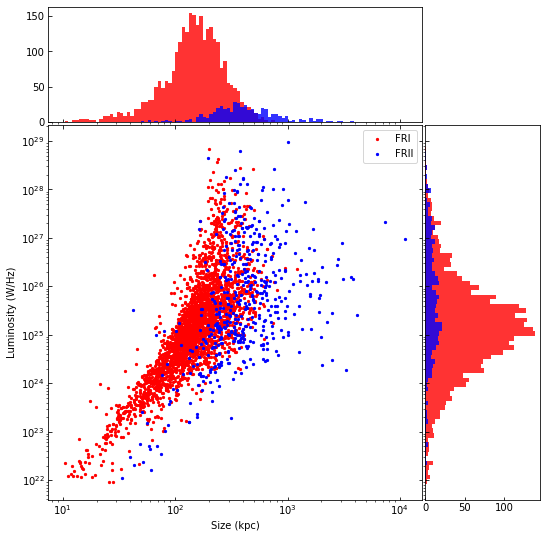

In [283]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(figsize=(8, 8))

ax_scatter = plt.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = plt.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = plt.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)


# the scatter plots:
ax_scatter.scatter(FRI0.phys_size, FRI0.luminosity, color='red', s=5)
ax_scatter.scatter(FRII0.phys_size, FRII0.luminosity, color='blue', s=5)
ax_scatter.set_ylabel('Luminosity (W/Hz)')
ax_scatter.set_xlabel('Size (kpc)')

ax_scatter.legend(['FRI' ,'FRII'])
ax_histx.hist(FRI0.phys_size, bins=np.logspace(np.log10(df.phys_size.min()),np.log10(df.phys_size.max()), 100), color='red', alpha=0.8)
ax_histy.hist(FRI0.luminosity, orientation='horizontal', bins=np.logspace(np.log10(df.luminosity.min()),np.log10(df.luminosity.max()), 100), color='red', alpha=0.8)
ax_histx.hist(FRII0.phys_size, bins=np.logspace(np.log10(df.phys_size.min()),np.log10(df.phys_size.max()), 100), color='blue', alpha=0.8)
ax_histy.hist(FRII0.luminosity, orientation='horizontal', bins=np.logspace(np.log10(df.luminosity.min()),np.log10(df.luminosity.max()), 100), color='blue', alpha=0.8)

#log scales
ax_scatter.set_yscale('log')
ax_scatter.set_xscale('log')
ax_histy.set_yscale('log')
ax_histx.set_xscale('log')


ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())

plt.show()

In [272]:
# The following cases are sources that have wrong size estimations
for group in df.groupby('source'):
    if group[1][group[1].dz==0.].phys_size.max()/group[1].phys_size.min()>2:
        df=df[df.source!=group[0]]

#Only keep sources that have at least 5 shifts
for group in df.groupby('source'):
    if len(group[1][['luminosity', 'dz']])!=5:
        df = df[df.source!=group[0]]
FRI = df[df.type=='FRI']
FRII = df[df.type=='FRII']

In [273]:
for delta_z in [0., 0.1, 0.2, 0.3, 0.4]:
    print(delta_z, np.mean(FRI[FRI.dz==delta_z].phys_size))

0.0 187.74989970465094
0.1 179.70420896721336
0.2 171.607681586952
0.3 162.60561366157617
0.4 154.17669557945646


In [274]:
for delta_z in [0., 0.1, 0.2, 0.3, 0.4]:
    print(delta_z, np.mean(FRII[FRII.dz==delta_z].phys_size))

0.0 585.3513419342834
0.1 587.5035912546787
0.2 573.4632230126921
0.3 579.6291221256264
0.4 566.0468550648948


In [275]:
for delta_z in [0., 0.1, 0.2, 0.3, 0.4]:
    print(delta_z, np.mean(FRI[FRI.dz==delta_z].luminosity))

0.0 4.352163162905283e+26
0.1 4.2767690508056696e+26
0.2 4.206445006478431e+26
0.3 4.1407375193452283e+26
0.4 4.079496012346537e+26


In [276]:
for delta_z in [0., 0.1, 0.2, 0.3, 0.4]:
    print(delta_z, np.mean(FRII[FRII.dz==delta_z].luminosity))

0.0 1.6202725760778787e+27
0.1 1.5951617091335486e+27
0.2 1.5688964134939453e+27
0.3 1.5332135697390195e+27
0.4 1.502222316314089e+27


In [277]:
for dz in [0, 0.1, 0.2, 0.3]:
    s1 = FRI[FRI.dz==round(dz,1)]
    s2 = FRI[FRI.dz==round(0.1+dz,1)]
    print(np.mean(s1.luminosity.to_numpy()/s2.luminosity.to_numpy()))
    print(np.mean(s1.phys_size.to_numpy()/s2.phys_size.to_numpy()))
    print()

1.0566492006394945
1.0532040181767512

1.066389204765115
1.0562614417226694

1.0817124422564937
1.0640424092669911

1.1020168550625618
1.0700727899452338



In [278]:
for dz in [0, 0.1, 0.2, 0.3]:
    s1 = FRII[FRII.dz==round(dz,1)]
    s2 = FRII[FRII.dz==round(0.1+dz,1)]
    print(np.mean(s1.luminosity.to_numpy()/s2.luminosity.to_numpy()))
    print(np.mean(s1.phys_size.to_numpy()/s2.phys_size.to_numpy()))
    print()

1.063018441054967
1.023686749962639

1.0956878627142723
1.0393160614447057

1.4386198015748777
1.0241386228577838

1.2858951262545288
1.044118619691802

